### 1. Re-code the house price machine learning

In [1]:
%matplotlib inline

from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd
import random

data = load_boston()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']
print(df.describe())
print(data['DESCR'])
X = df.RM # I choose RM column

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

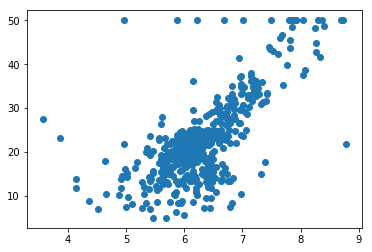

In [19]:
import random

def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b

k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X]

plt.scatter(X, y)
# draw_rm_and_price()
# plt.scatter(X, price_by_random_k_and_b)
plt.savefig("plot.png")

###### 1. Random Choose Method to get optimal *k* and *b*

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

In [3]:
def RMSE(y, y_hat):
    return np.sqrt(sum((y - y_hat) ** 2) / len(y))

def MAE(y, y_hat):
    return sum(abs(y - y_hat)) / len(y)

def loss_random(X, y, n, loss=RMSE):
    loss_min = float('inf')
    k_best, b_best = 0, 0
    for i in range(n):
        k = random.random() * 200 - 100
        b = random.random() * 200 - 100
        y_hat = k * X + b
        loss_new = loss(y, y_hat)
        if loss_new < loss_min:
            loss_min = loss_new
            k_best, b_best = k, b
            print(f"round: {i}, k: {k_best}, b: {b_best}, {loss.__name__}: {loss_min}")
        
    return (k_best, b_best)
loss_random(X, y, 2000, RMSE)

round: 0, k: 4.402874158246391, b: 43.9869794773561, <function RMSE at 0x1a227b3378>: 49.6760472638054
round: 9, k: -6.164610809021909, b: 63.35799023513985, <function RMSE at 0x1a227b3378>: 12.758239429343842
round: 21, k: 7.399690002005215, b: -33.443699875605844, <function RMSE at 0x1a227b3378>: 11.608200130639993
round: 120, k: 15.726685151188917, b: -76.57825590792893, <function RMSE at 0x1a227b3378>: 8.080710915756143
round: 1007, k: 7.305008403497709, b: -19.71394884241468, <function RMSE at 0x1a227b3378>: 7.655457643047357


(7.305008403497709, -19.71394884241468)

###### 2.Supervised Direction to get optimal *k* and *b*

In [4]:
# This is a combination of supervising and random walking.
def loss_spvs_dr(X, y, n, alpha=0.1, loss=RMSE):
    loss_min = float('inf')
    direction = [(1, 1), (1, -1), (-1, 1), (-1, -1)]
    
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    
    for i in range(n):
        dr_k, dr_b = random.choice(direction) # random walk. Can we walk 4 directions and compare which one is the best?
        k_new = k + dr_k * alpha
        b_new = b + dr_b * alpha
        y_hat = k_new * X + b_new
        loss_new = loss(y, y_hat)
        if loss_new < loss_min:
            k, b = k_new, b_new
            k_best, b_best = k_new, b_new
            loss_min = loss_new
            print(f"round: {i}, k: {k_best}, b: {b_best}, {loss.__name__}: {loss_min}")
    return (k_best, b_best)
loss_spvs_dr(X, y, 2000)

round: 0, k: 13.714813589436014, b: -59.465921698424935, <function RMSE at 0x1a227b3378>: 8.46593882601321
round: 1, k: 13.614813589436014, b: -59.56592169842494, <function RMSE at 0x1a227b3378>: 8.102038367978507
round: 4, k: 13.514813589436015, b: -59.66592169842494, <function RMSE at 0x1a227b3378>: 7.790064383178364
round: 6, k: 13.414813589436015, b: -59.56592169842494, <function RMSE at 0x1a227b3378>: 7.592215792772355
round: 7, k: 13.314813589436016, b: -59.465921698424935, <function RMSE at 0x1a227b3378>: 7.427434234677676
round: 16, k: 13.214813589436016, b: -59.56592169842494, <function RMSE at 0x1a227b3378>: 7.269085330339243
round: 17, k: 13.114813589436016, b: -59.465921698424935, <function RMSE at 0x1a227b3378>: 7.191163175359859
round: 18, k: 13.014813589436017, b: -59.56592169842494, <function RMSE at 0x1a227b3378>: 7.157975160853071


(13.014813589436017, -59.56592169842494)

#### Walk through all 4 directions and find the smallest loss

In [39]:
# Here I try completely supervised direction: walk all 4 directions at the same time, 
# then select the one with smallest loss.
def calculate_loss(X, y, n, alpha=0.01, loss=RMSE):
    '''
    calculate the loss for all 4 directions and select the smallest one
    '''
    loss_min = float('inf')
    direction = [(1, 1), (1, -1), (-1, 1), (-1, -1)]
    
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    
    for i in range(n):
        loss_complete = []
        best_data = []
        k_b = []
        for coord in direction:
            dr_k, dr_b = coord
#             print(dr_k, dr_b)
            k_new = k + dr_k * alpha
            b_new = b + dr_b * alpha
            k_b.append((k_new, b_new))
            y_hat = k_new * X + b_new
            loss_complete.append(loss(y, y_hat))
        best_data = sorted(zip(loss_complete, k_b), key=lambda x: x[0])[0]
#         print(best_data)
        loss_new, (k_n, b_n) = best_data
        if loss_new < loss_min:
            k, b = k_n, b_n
            k_best, b_best = k_new, b_new
            loss_min = loss_new
            print(f"round: {i}, k: {k}, b: {b}, {loss.__name__}: {loss_min}")
    return (k_best, b_best)
calculate_loss(X, y, 2000, alpha=0.1)

round: 0, k: -98.48381327706217, b: -44.28333409848043, RMSE: 689.9280482413046
round: 1, k: -98.38381327706217, b: -44.18333409848043, RMSE: 689.1963123847747
round: 2, k: -98.28381327706218, b: -44.08333409848043, RMSE: 688.4645767440443
round: 3, k: -98.18381327706219, b: -43.98333409848043, RMSE: 687.7328413198011
round: 4, k: -98.08381327706219, b: -43.883334098480425, RMSE: 687.0011061127383
round: 5, k: -97.9838132770622, b: -43.783334098480424, RMSE: 686.269371123549
round: 6, k: -97.8838132770622, b: -43.68333409848042, RMSE: 685.5376363529323
round: 7, k: -97.78381327706221, b: -43.58333409848042, RMSE: 684.8059018015882
round: 8, k: -97.68381327706221, b: -43.48333409848042, RMSE: 684.07416747022
round: 9, k: -97.58381327706222, b: -43.38333409848042, RMSE: 683.3424333595351
round: 10, k: -97.48381327706223, b: -43.28333409848042, RMSE: 682.6106994702428
round: 11, k: -97.38381327706223, b: -43.183334098480415, RMSE: 681.8789658030554
round: 12, k: -97.28381327706224, b: -43

round: 127, k: -85.78381327706289, b: -31.58333409848025, RMSE: 596.9995856034025
round: 128, k: -85.6838132770629, b: -31.48333409848025, RMSE: 596.2678838345391
round: 129, k: -85.5838132770629, b: -31.383334098480248, RMSE: 595.5361823989136
round: 130, k: -85.48381327706291, b: -31.283334098480246, RMSE: 594.804481297755
round: 131, k: -85.38381327706291, b: -31.183334098480245, RMSE: 594.0727805323003
round: 132, k: -85.28381327706292, b: -31.083334098480243, RMSE: 593.3410801037912
round: 133, k: -85.18381327706292, b: -30.983334098480242, RMSE: 592.6093800134756
round: 134, k: -85.08381327706293, b: -30.88333409848024, RMSE: 591.8776802626074
round: 135, k: -84.98381327706294, b: -30.78333409848024, RMSE: 591.1459808524476
round: 136, k: -84.88381327706294, b: -30.683334098480238, RMSE: 590.4142817842632
round: 137, k: -84.78381327706295, b: -30.583334098480236, RMSE: 589.6825830593262
round: 138, k: -84.68381327706295, b: -30.483334098480235, RMSE: 588.9508846789164
round: 139,

round: 254, k: -73.08381327706361, b: -18.88333409848007, RMSE: 504.076610964683
round: 255, k: -72.98381327706362, b: -18.78333409848007, RMSE: 503.3449638475523
round: 256, k: -72.88381327706362, b: -18.683334098480067, RMSE: 502.61331728438637
round: 257, k: -72.78381327706363, b: -18.583334098480066, RMSE: 501.88167127760664
round: 258, k: -72.68381327706363, b: -18.483334098480064, RMSE: 501.15002582965064
round: 259, k: -72.58381327706364, b: -18.383334098480063, RMSE: 500.41838094296946
round: 260, k: -72.48381327706365, b: -18.28333409848006, RMSE: 499.68673662002874
round: 261, k: -72.38381327706365, b: -18.18333409848006, RMSE: 498.95509286330827
round: 262, k: -72.28381327706366, b: -18.08333409848006, RMSE: 498.2234496753018
round: 263, k: -72.18381327706366, b: -17.983334098480057, RMSE: 497.4918070585199
round: 264, k: -72.08381327706367, b: -17.883334098480056, RMSE: 496.76016501548526
round: 265, k: -71.98381327706367, b: -17.783334098480054, RMSE: 496.0285235487374
rou

round: 376, k: -60.88381327706408, b: -6.6833340984800635, RMSE: 414.8206168694772
round: 377, k: -60.78381327706408, b: -6.583334098480064, RMSE: 414.089060537535
round: 378, k: -60.683813277064075, b: -6.483334098480064, RMSE: 413.3575052005355
round: 379, k: -60.583813277064074, b: -6.383334098480065, RMSE: 412.62595086377047
round: 380, k: -60.48381327706407, b: -6.283334098480065, RMSE: 411.89439753256886
round: 381, k: -60.38381327706407, b: -6.183334098480065, RMSE: 411.1628452122988
round: 382, k: -60.28381327706407, b: -6.083334098480066, RMSE: 410.43129390836526
round: 383, k: -60.18381327706407, b: -5.983334098480066, RMSE: 409.6997436262131
round: 384, k: -60.08381327706407, b: -5.883334098480066, RMSE: 408.9681943713254
round: 385, k: -59.983813277064066, b: -5.783334098480067, RMSE: 408.23664614922404
round: 386, k: -59.883813277064064, b: -5.683334098480067, RMSE: 407.5050989654717
round: 387, k: -59.78381327706406, b: -5.5833340984800675, RMSE: 406.77355282567015
round:

round: 495, k: -48.98381327706391, b: 5.216665901519928, RMSE: 327.7742229199662
round: 496, k: -48.88381327706391, b: 5.316665901519928, RMSE: 327.0428359403422
round: 497, k: -48.783813277063906, b: 5.416665901519927, RMSE: 326.3114509803218
round: 498, k: -48.683813277063905, b: 5.516665901519927, RMSE: 325.5800680535155
round: 499, k: -48.5838132770639, b: 5.6166659015199265, RMSE: 324.8486871736567
round: 500, k: -48.4838132770639, b: 5.716665901519926, RMSE: 324.1173083546016
round: 501, k: -48.3838132770639, b: 5.816665901519926, RMSE: 323.3859316103332
round: 502, k: -48.2838132770639, b: 5.916665901519925, RMSE: 322.65455695496047
round: 503, k: -48.1838132770639, b: 6.016665901519925, RMSE: 321.9231844027206
round: 504, k: -48.083813277063896, b: 6.116665901519925, RMSE: 321.19181396798035
round: 505, k: -47.983813277063895, b: 6.216665901519924, RMSE: 320.4604456652377
round: 506, k: -47.883813277063894, b: 6.316665901519924, RMSE: 319.7290795091232
round: 507, k: -47.783813

round: 607, k: -37.78381327706375, b: 16.416665901519895, RMSE: 245.87554250014205
round: 608, k: -37.68381327706375, b: 16.516665901519897, RMSE: 245.14450631823183
round: 609, k: -37.58381327706375, b: 16.616665901519898, RMSE: 244.41347493161604
round: 610, k: -37.483813277063746, b: 16.7166659015199, RMSE: 243.68244838345095
round: 611, k: -37.383813277063744, b: 16.8166659015199, RMSE: 242.95142671741235
round: 612, k: -37.28381327706374, b: 16.916665901519902, RMSE: 242.22040997770324
round: 613, k: -37.18381327706374, b: 17.016665901519904, RMSE: 241.4893982090613
round: 614, k: -37.08381327706374, b: 17.116665901519905, RMSE: 240.75839145676716
round: 615, k: -36.98381327706374, b: 17.216665901519907, RMSE: 240.0273897666531
round: 616, k: -36.88381327706374, b: 17.316665901519908, RMSE: 239.29639318511093
round: 617, k: -36.783813277063736, b: 17.41666590151991, RMSE: 238.56540175910047
round: 618, k: -36.683813277063734, b: 17.51666590151991, RMSE: 237.83441553615876
round: 6

round: 730, k: -25.483813277063575, b: 28.71666590152007, RMSE: 156.01446743379145
round: 731, k: -25.383813277063574, b: 28.81666590152007, RMSE: 155.28462501683478
round: 732, k: -25.283813277063572, b: 28.916665901520073, RMSE: 154.55480146684502
round: 733, k: -25.18381327706357, b: 29.016665901520074, RMSE: 153.82499705236555
round: 734, k: -25.08381327706357, b: 29.116665901520076, RMSE: 153.095212047053
round: 735, k: -24.983813277063568, b: 29.216665901520077, RMSE: 152.36544672979957
round: 736, k: -24.883813277063567, b: 29.31666590152008, RMSE: 151.6357013848592
round: 737, k: -24.783813277063565, b: 29.41666590152008, RMSE: 150.90597630197558
round: 738, k: -24.683813277063564, b: 29.51666590152008, RMSE: 150.17627177651653
round: 739, k: -24.583813277063562, b: 29.616665901520083, RMSE: 149.44658810960973
round: 740, k: -24.48381327706356, b: 29.716665901520084, RMSE: 148.71692560828444
round: 741, k: -24.38381327706356, b: 29.816665901520086, RMSE: 147.98728458561612
roun

round: 852, k: -13.283813277063452, b: 40.91666590152024, RMSE: 67.29428797987777
round: 853, k: -13.183813277063452, b: 41.01666590152024, RMSE: 66.57330456361272
round: 854, k: -13.083813277063452, b: 41.11666590152024, RMSE: 65.85256060464027
round: 855, k: -12.983813277063453, b: 41.216665901520244, RMSE: 65.1320640523819
round: 856, k: -12.883813277063453, b: 41.316665901520246, RMSE: 64.4118232091501
round: 857, k: -12.783813277063453, b: 41.41666590152025, RMSE: 63.691846749780346
round: 858, k: -12.683813277063454, b: 41.51666590152025, RMSE: 62.97214374257615
round: 859, k: -12.583813277063454, b: 41.61666590152025, RMSE: 62.25272367167007
round: 860, k: -12.483813277063454, b: 41.71666590152025, RMSE: 61.533596460912456
round: 861, k: -12.383813277063455, b: 41.81666590152025, RMSE: 60.81477249941
round: 862, k: -12.283813277063455, b: 41.916665901520254, RMSE: 60.096262668846954
round: 863, k: -12.183813277063456, b: 42.016665901520255, RMSE: 59.37807837273418
round: 864, k:

(-4.283813277063484, 49.31666590152036)

###### 3.Gradient Descent to get optimal *k* and *b*

#### Equations:

$$ RMSE = \frac{1}{n}\sum{(y - (kx+b))^2} = \frac{1}{n}\sum(y^2 -2y(kx+b) + (kx+b)^2)) = \frac{1}{n}\sum{y^2 - 2yxk - 2yb + k^2x^2 + 2kxb + b^2}$$

$$ \frac{\partial{_{loss}}}{\partial{_k}} = \frac{2}{n}(-y + kx + b)x = \frac{2}{n}(-y + \hat{y})x$$

$$ \frac{\partial{_{loss}}}{\partial{_b}} = \frac{2}{n}(-y + kx + b) = \frac{2}{n}(-y + \hat{y})$$

In [5]:
def partial_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    return -2 / n * gradient

def partial_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    return -2 / n * gradient

def gradient(X, y, n, alpha=0.01, loss=RMSE):
    loss_min = float('inf')
    
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    
    for i in range(n):
        y_hat = k * X + b
        loss_new = RMSE(y, y_hat)
        if loss_new < loss_min:
            loss_min = loss_new
            if i % 1000 == 0:
                print(f"round: {i}, k: {k}, b: {b}, {loss.__name__}: {loss_min}")
        k_gradient = partial_k(X, y, y_hat)
        b_gradient = partial_b(y, y_hat)
        k += -k_gradient * alpha
        b += -b_gradient * alpha
    return (k, b)
gradient(X, y, 20000)

round: 0, k: 11.156848907834998, b: 34.487763921710496, RMSE: 82.34950118756377
round: 1000, k: 0.7992544802908168, b: 18.144816520920383, RMSE: 8.830002354522238
round: 2000, k: 2.5741248302688047, b: 6.854656772828753, RMSE: 8.052691129081738
round: 3000, k: 3.9695877416492, b: -2.02204748459325, RMSE: 7.532171608121235
round: 4000, k: 5.066747732553548, b: -9.001211662234999, RMSE: 7.1915873010742555
round: 5000, k: 5.929371909680884, b: -14.488465850944893, RMSE: 6.972735132505126
round: 6000, k: 6.607596122314869, b: -18.802730104531825, RMSE: 6.833944311505154
round: 7000, k: 7.140838865562368, b: -22.194750122134536, RMSE: 6.746721061248803
round: 8000, k: 7.560092289325878, b: -24.861670626656508, RMSE: 6.692234282732166
round: 9000, k: 7.889723466802294, b: -26.95849344625369, RMSE: 6.65832954708607
round: 10000, k: 8.14889061250885, b: -28.607086244324975, RMSE: 6.63728425749704
round: 11000, k: 8.35265656064489, b: -29.90326548677261, RMSE: 6.624241388379993
round: 12000, k:

(9.016067269426474, -34.12329929421756)

###### 4. Try different Loss function and learning rate. 

$$ MAE = \frac{1}{n}\sum{|y - \hat{y}|} = \frac{1}{n}{\sum{|y - (kx+b)}|} $$

$$ \frac{\partial{loss}}{\partial{k}} = \frac{1}{n}{\sum{\left\{
\begin{array}{rcl}
-x       &      & {y - \hat{y} > 0}\\
x     &      & {y - \hat{y} < 0}
\end{array} \right.}} $$

$$ \frac{\partial{loss}}{\partial{b}} = \frac{1}{n}{\sum {\left\{
\begin{array}{rcl}
-1       &      & {y - \hat{y} > 0}\\
1     &      & {y - \hat{y} < 0}
\end{array} \right.}} $$

In [6]:
# gradient(X, y, 20000, alpha=0.1) # overflow
print("\n")
# gradient(X, y, 20000, alpha=1) # overflow
print("\n")

def partial_k(x, y, y_hat):
    n = len(x)
    gradient = 0
    for xi, y_i, y_hat_i in zip(x, y, y_hat):
        if y_i - y_hat_i > 0:
            gradient += xi
        else:
            gradient -= xi
    return -1 / n * gradient

def partial_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(y, y_hat):
        if y_i - y_hat_i > 0:
            gradient += 1
        else:
            gradient -= 1
    return -1 / n
# MAE with default alpha
gradient(X, y, 20000, loss=MAE) 





round: 0, k: 28.308544542429104, b: -0.4267794138153249, MAE: 155.6747402772041


(3.515829285509879, -0.03152249681912336)

In [7]:
# MAE with alpha = 0.1
gradient(X, y, 20000, loss=MAE, alpha=0.1)

round: 0, k: -30.01445269214335, b: -15.64018088986063, MAE: 228.55416939727533


(5.4182405884896205, -11.68761171990684)

In [8]:
# MAE with alpha = 0.5
gradient(X, y, 20000, loss=MAE, alpha=1)

round: 0, k: 36.23549466060345, b: 96.29156913823226, MAE: 302.1587316166799


(-19.536868975768993, 135.81726083785605)